In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
police_killings=pd.read_csv("police_killings.csv",encoding="ISO-8859-1")
#print(police_killings.columns)
#print(police_killings.head(3))

In [3]:
#print(police_killings["raceethnicity"])
police_race=police_killings["raceethnicity"].value_counts()
police_race_data=police_race.tolist()
police_race_index=police_race.index
police_race_len=len(police_race)
def bar_graph(N,list_print,index_print):
    ind = np.arange(N)  # the x locations for the groups    
    fig=plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.bar(ind, list_print)
    ax.set_xticks(ind+0.5)
    ax.set_xticklabels(index_print)
    plt.show()
bar_graph(police_race_len,police_race_data,police_race_index)
police_race_ratio=police_race_data/sum(police_race_data)
bar_graph(police_race_len,police_race_ratio,police_race_index)

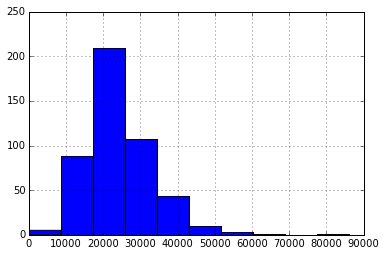

In [49]:
def remove_value(df,column,new_column,value):
    column_list=df[column].tolist()
    column_new=[]
    for c in column_list:
        if c==value :
            column_new.append(0)
        else:
            column_new.append(c)
    df[new_column]=column_new 
    return df
police_killings=remove_value(police_killings,"p_income","income","-")
police_killings["income"].astype("int").hist()
#police_killings["income"].hist()
#print(police_killings["income"])

In [47]:
#print(police_killings.head(3))
#print(police_killings.columns)
state_pop=pd.read_csv("state_population.csv")
#print(state_pop.head(3))
counts=police_killings["state_fp"].value_counts() 
states = pd.DataFrame({"STATE": counts.index, "shootings": counts})
#print(states.head(3))
states=states.merge(state_pop, on='STATE')
#print(state_pop.head(3))
states["pop_millions"]=states["POPESTIMATE2015"]/1000000
states["rate"]=states["shootings"]/states["pop_millions"]
states=states.sort("rate")
print(states)
#print(states[states["NAME"]=="Georgia"])
#print(states[states["NAME"]=="Texas"])

    STATE  shootings  SUMLEV REGION DIVISION                  NAME  \
43      9          1      40      1        1           Connecticut   
22     42          7      40      1        2          Pennsylvania   
38     19          2      40      2        4                  Iowa   
6      36         13      40      1        2              New York   
29     25          5      40      1        1         Massachusetts   
42     33          1      40      1        1         New Hampshire   
45     23          1      40      1        1                 Maine   
11     17         11      40      2        3              Illinois   
12     39         10      40      2        3                  Ohio   
31     55          5      40      2        3             Wisconsin   
16     26          9      40      2        3              Michigan   
28     47          6      40      3        6             Tennessee   
15     37         10      40      3        5        North Carolina   
36     32          3

In [60]:
lowest_shooting_rate_states=states.iloc[0:10]
highest_shooting_rate_states=states.iloc[-11:-1]
#print(highest_shooting_rate_states)
pk=remove_value(police_killings,"share_white","share_white","-")
pk=remove_value(police_killings,"share_black","share_black","-")
pk=remove_value(police_killings,"share_hispanic","share_hispanic","-")
pk["share_white"]=pk["share_white"].astype("float")
pk["share_black"]=pk["share_black"].astype("float")
pk["share_hispanic"]=pk["share_hispanic"].astype("float")
lowest_shooting_rate_pk = pd.DataFrame({"share_white":pk["share_white"].isin(lowest_shooting_rate_states),"share_black":pk["share_black"].isin(lowest_shooting_rate_states),"share_hispanic":pk["share_hispanic"].isin(lowest_shooting_rate_states)})
highest_shooting_rate_pk = pd.DataFrame({"share_white":pk["share_white"].isin(highest_shooting_rate_states),"share_black":pk["share_black"].isin(highest_shooting_rate_states),"share_hispanic":pk["share_hispanic"].isin(highest_shooting_rate_states)})
lowest_shooting_rate_pk_share_white_mean=lowest_shooting_rate_pk["share_white"].mean()
lowest_shooting_rate_pk_share_black_mean=lowest_shooting_rate_pk["share_black"].mean()
lowest_shooting_rate_pk_share_hispanic_mean=lowest_shooting_rate_pk["share_hispanic"].mean()
highest_shooting_rate_pk_share_white_mean=highest_shooting_rate_pk["share_white"].mean()
highest_shooting_rate_pk_share_black_mean=highest_shooting_rate_pk["share_black"].mean()
highest_shooting_rate_pk_share_hispanic_mean=highest_shooting_rate_pk["share_hispanic"].mean()
